# Módulo 10 atividade 1

Uma instituição financeira quer conhecer melhor o perfil de renda de seus novos clientes para diversos fins, por exemplo, melhor dimensionar o limite de cartões de crédito dos novos clientes, sem necessariamente solicitar olerites ou documentações que impactem na experiência do seu cliente.

Para isto, conduziu um estudo com alguns clientes, comprovando suas rendas através de olerites e outros documentos, e pretende construir um modelo preditivo para esta renda com base em algumas variáveis que já possui em seu banco de dados.

As variáveis são intuitivas - note que há uma variável 'index' que é um identificador do cliente e que em geral o ```read_csv``` do pandas coloca também uma variável sequencial.

Estes dados estão no arquivo ```previsao_de_renda.csv```. Carregue-o em um *dataframe*.

1) Avalie a estrutura de correlação das variáveis quantitativas através de um gráfico de "matriz de dispersão" e através da avaliação gráfica da matriz de correlações. Veja se você identifica algum padrão interessante ou que te faça sentido.

In [8]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [10]:
df = pd.read_csv('Profissao- Cientista de Dados_M10_support material.csv')
df.head()

,Unnamed: 0,data_ref,index,sexo,posse_de_veiculo,posse_de_imovel,qtd_filhos,tipo_renda,educacao,estado_civil,tipo_residencia,idade,tempo_emprego,qt_pessoas_residencia,mau,renda
0,0,2015-01-01,8682,F,False,True,1,Assalariado,Secundário,Casado,Casa,36,3.575342,3.0,False,3369.24
1,1,2015-01-01,12830,M,True,True,0,Empresário,Secundário,Casado,Casa,42,0.860274,2.0,False,6096.14
2,2,2015-01-01,2885,M,True,True,2,Assalariado,Superior completo,Casado,Casa,31,8.065753,4.0,False,5658.98
3,3,2015-01-01,16168,F,True,False,0,Empresário,Secundário,Casado,Casa,50,1.208219,2.0,False,7246.69
4,4,2015-01-01,12438,M,False,False,0,Assalariado,Secundário,Casado,Casa,52,13.873973,2.0,False,4017.37


In [11]:
df.select_dtypes(include='number').head()

,Unnamed: 0,index,qtd_filhos,idade,tempo_emprego,qt_pessoas_residencia,renda
0,0,8682,1,36,3.575342,3.0,3369.24
1,1,12830,0,42,0.860274,2.0,6096.14
2,2,2885,2,31,8.065753,4.0,5658.98
3,3,16168,0,50,1.208219,2.0,7246.69
4,4,12438,0,52,13.873973,2.0,4017.37


In [12]:
df1=df[['tipo_renda','renda','qtd_filhos','idade','tempo_emprego','qt_pessoas_residencia']]
df1.corr()

,renda,qtd_filhos,idade,tempo_emprego,qt_pessoas_residencia
renda,1.000000,0.009567,0.042570,0.394235,0.020977
qtd_filhos,0.009567,1.000000,-0.364303,-0.074250,0.896488
idade,0.042570,-0.364303,1.000000,0.323934,-0.338805
tempo_emprego,0.394235,-0.074250,0.323934,1.000000,-0.065748
qt_pessoas_residencia,0.020977,0.896488,-0.338805,-0.065748,1.000000


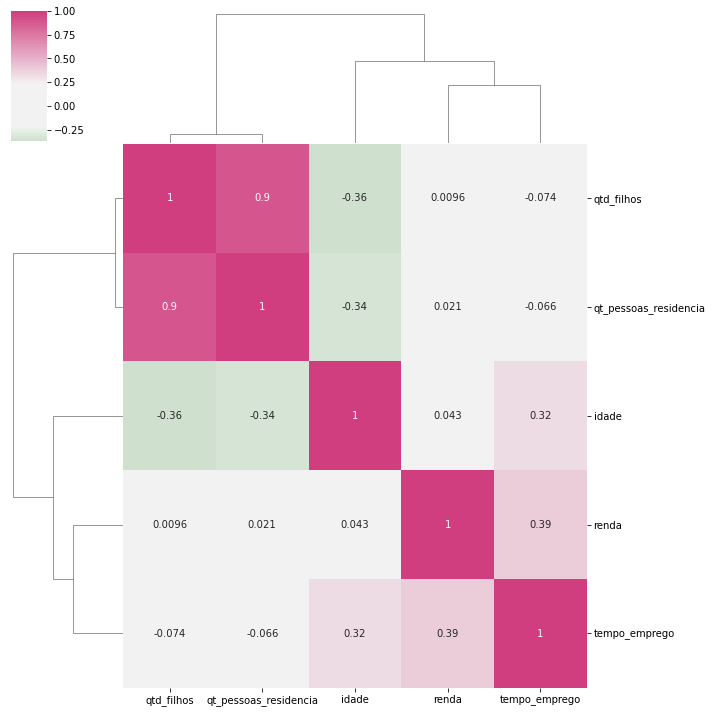

In [13]:
renda_cmap = sns.diverging_palette(h_neg=125,h_pos=350,as_cmap=True,sep=60,center='light')
sns.clustermap(df1.corr(),figsize=(10,10),center=0,annot=True,cmap=renda_cmap)

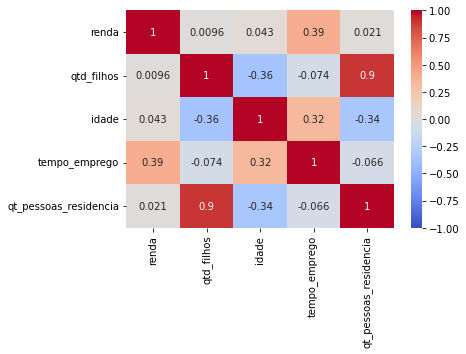

In [14]:
_ = sns.heatmap(df1.corr(),annot=True,vmin=-1,vmax=1,cmap='coolwarm')

,tempo_emprego,renda
tempo_emprego,1.000000,0.394235
renda,0.394235,1.000000


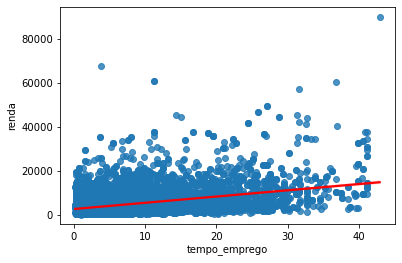

In [15]:
df1 = df[['tempo_emprego','renda']]
_ = sns.regplot(x = 'tempo_emprego', y ='renda', data = df1, line_kws = {'color': 'red'})
df1.corr()

,tempo_emprego,idade
tempo_emprego,1.000000,0.323934
idade,0.323934,1.000000


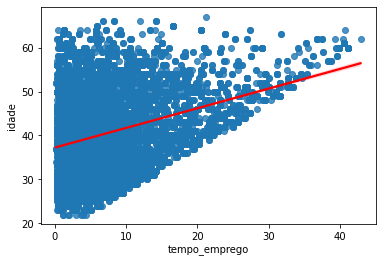

In [16]:
df1 = df[['tempo_emprego','idade']]
_ = sns.regplot(x = 'tempo_emprego', y ='idade', data = df1, line_kws = {'color': 'red'})
df1.corr()

Tempo de emprego e renda: no sentido de que quanto maior o tempo de emprego maior a renda recebida pelo empregado. Tendo uma correlação de 0.39

Tempo de emprego e idade: Quanto maior o tempo de emprego maior a idade. Tendo uma correlação de 0.32, interessante foi observar que apenas pelo meu insight esta correlação seria maior que a emprego por renda.

2) Avalie um gráfico de dispersão (*scatterplot*) específico para as duas variáveis mais correlacionadas com *renda*.

As varáveis, que mais são correlacionadas com renda são tempo_emprego e posse_de_veiculo, porém acrescentei também a variável idade.

<AxesSubplot:>

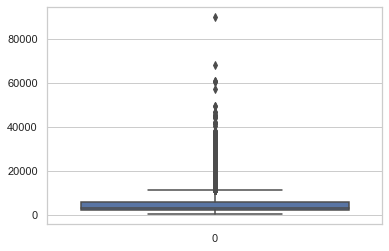

In [17]:
df1 = df[['tempo_emprego','renda']]
sns.set(style="whitegrid", color_codes=True)
sns.boxplot(data=df1['renda'])

<AxesSubplot:>

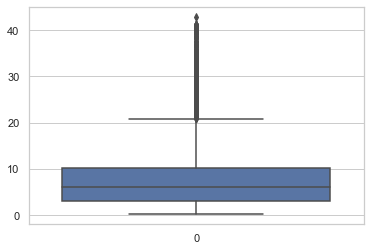

In [18]:
sns.boxplot(data=df1['tempo_emprego'])

,tempo_emprego,renda
tempo_emprego,1.000000,0.394235
renda,0.394235,1.000000


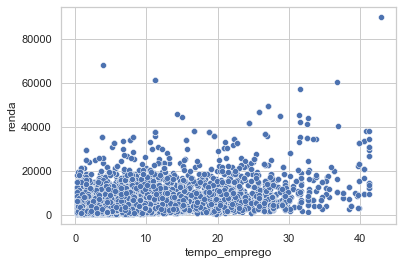

In [19]:
sns.scatterplot(x = 'tempo_emprego', y ='renda', data = df1)
df1.corr()

3) Na su aopinião, há outliers na variável renda?

Text(0.5, 1.0, 'Renda com Outliers')

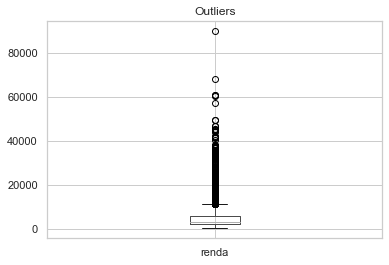

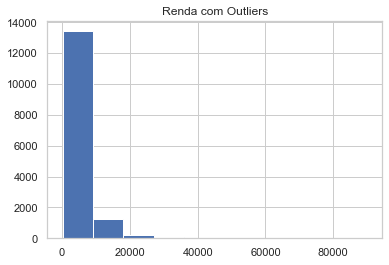

In [20]:
df1.boxplot(['renda'])
plt.title('Outliers')
df1.hist(['renda'])
plt.title('Renda com Outliers')

In [21]:
valor = df1['renda']
Q1 = valor.quantile(.25)
Q3 = valor.quantile(.75)
IIQ = Q3 - Q1
limite_inferior = Q1 - 1.5 * IIQ
limite_superior = Q3 + 1.5 * IIQ

Text(0.5, 1.0, 'Renda sem Outliers')

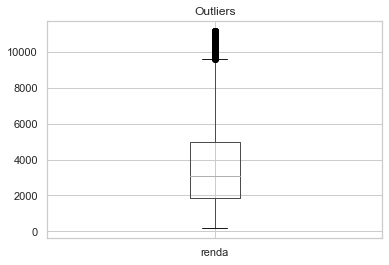

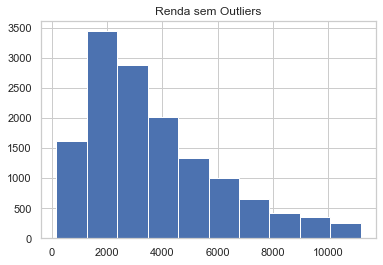

In [22]:
selecao = (valor>= limite_inferior) & (valor <= limite_superior)
df1_new = df1[selecao]
df1_new.boxplot(['renda'])
plt.title('Outliers')
df1_new.hist(['renda'])
plt.title('Renda sem Outliers')

Text(0.5, 1.0, 'Com Outliers')

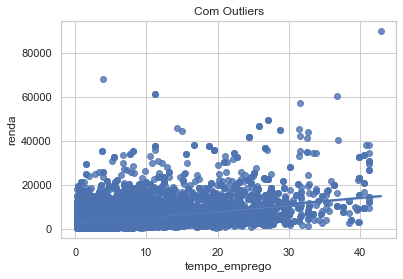

In [23]:
_ = sns.regplot(x='tempo_emprego', y='renda', data = df1)
plt.title('Com Outliers')

Text(0.5, 1.0, 'Sem Outliers')

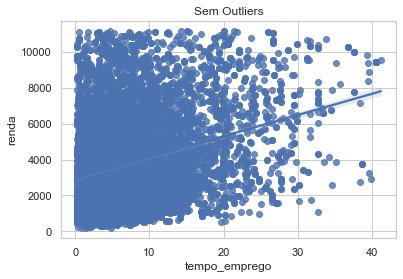

In [24]:
_ = sns.regplot(x='tempo_emprego', y='renda', data = df1_new)
plt.title('Sem Outliers')

Confirmada a existência de outliers. No entanto ainda seria prematuro afirmar se tais ocorrências se tratem realmente de erro, uma vez que os padrões de renda, embora distantes da média, podem vir a ser perfeitamente plausíveis.

4) Calcule o logaritmo da variável renda e repita a sequência de análise

In [25]:
df4_log=df1[['tempo_emprego','renda']].copy()
df4_log.rename(columns={'tempo_emprego': 'x','renda': 'y'}, inplace=True)
df4_log['log_y'] = np.log(df4_log['y'])
df4_log.corr()

,x,y,log_y
x,1.000000,0.394235,0.379556
y,0.394235,1.000000,0.835734
log_y,0.379556,0.835734,1.000000


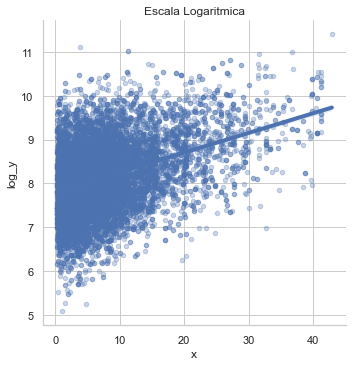

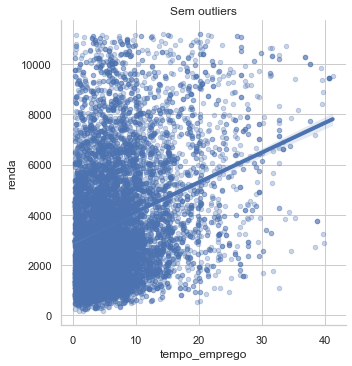

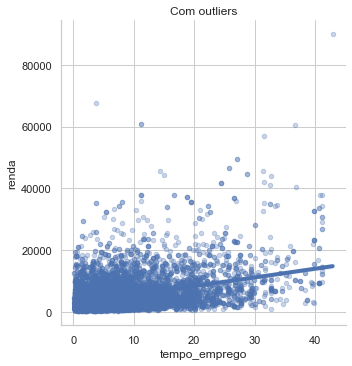

In [26]:
%matplotlib inline

sns.lmplot(x='x',
                  y='log_y', 
                 data=df4_log, 
                 scatter_kws={'s': 20, 'alpha': 0.3},
                 line_kws={'lw': 4});
plt.title('Escala Logaritmica')

sns.lmplot(x='tempo_emprego',
                  y='renda', 
                 data=df1_new, 
                 scatter_kws={'s': 20, 'alpha': 0.3},
                 line_kws={'lw': 4})
plt.title('Sem outliers')

sns.lmplot(x='tempo_emprego',
                  y='renda', 
                 data=df1, 
                 scatter_kws={'s': 20, 'alpha': 0.3},
                 line_kws={'lw': 4})
plt.title('Com outliers');

5) A aplicação do LOG você acha que melhorou ou piorou a análise?

A utilização da escala logarítmica apresentou um gráfico mais limpo e organizado, dando a impressão de uma leitura mais fácil dos dados comparativos da renda x tempo de emprego. Porém, algumas desvantagens puderam também ser observadas neste modelo: 1) O logarítmo acaba substituindo os valores da renda por um índice, o que acaba prejudicando a análise; 2) A variação no índice de correlação da coluna y_log foi muito pequena para justificar a sua utilização do logarítimo. Este efeito pode ter relação direta com o fato de que a renda e o tempo de emprego não constitui necessariamente um fator multiplicativo.